# Naive Bayes classifier

Naive Bayes classifier where each pixel is distributed according to a Beta distribution of parameters α, β:
$d(x ; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha - 1} (1-x)^{\beta - 1}$

P.S. For a discussion about maximum likelihood for the parameters of a beta distribution you can look here. However, for this assignment the estimators obtained with the moments approach will be fine:

$$
\begin{aligned}
    & \alpha = KE[X] \\
    & \beta = K(1 - E[X]) \\
    & K = \frac{
        E[X](1 - E[X])
    }{
        Var[X]
    } - 1
\end{aligned}
$$

Note:
$α/(α+β)$ is the mean of the beta distribution.
if you compute the mean for each of the 784 models and reshape them into 28x28 images you can have a visual indication of what the model is learning.

# Setup
Let us import the required modules.

In [1]:
import time

from loguru import logger
from src.classifiers.naivebayes import Beta_NB
import src.utilities.data_split as ds
import src.utilities.evaluation as eva

## Load Data
Note that the dataset is already split into Train-Test sets.

In [2]:
data_split = ds.TrainTestSplit.from_csv_directory(dir_path="../data")

In [3]:
data_split.x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 358.9 MB


In [4]:
data_split.y_train.shape

(60000,)

## Tuning

No hyper-parameters to tune

## Model Training

In [8]:
start_time = time.time()
b_nb=Beta_NB()
b_nb.fit(data_split.x_train, data_split.y_train)
logger.info("--- %s seconds ---" % (time.time() - start_time))

2022-12-28 04:22:49.666 | INFO     | __main__:<module>:5 - --- 0.20932507514953613 seconds ---


Visual indication of what the model is learning using the mean of the beta distribution

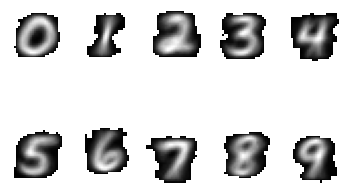

In [9]:
b_nb.plot_beta_means()

# Performance

In [10]:
start_time = time.time()
b_nb_test_pred = b_nb.predict(data_split.x_test)
logger.info("Prediction: - %s seconds -" % (time.time() - start_time))
b_nb_test_eval = eva.Evaluation(y_true=data_split.y_test, y_pred=b_nb_test_pred)

2022-12-28 04:24:21.679 | INFO     | __main__:<module>:3 - Prediction: - 91.01520299911499 seconds -


In [11]:
print("Testing:")
b_nb_test_eval.acc_eval()

Testing:
-----Model Evaluations:-----
Accuracy score: 0.7775


In [13]:
# save the model and evaluation
b_nb_model = eva.EvaluatedModel(b_nb, "beta_naivebayes", test_eval=b_nb_test_eval)
b_nb_model.save_evaluation()

In [14]:
# load the previously saved model and evaluations
b_nb_model = eva.EvaluatedModel.load_evaluation("beta_naivebayes")

### Confusion Matrix

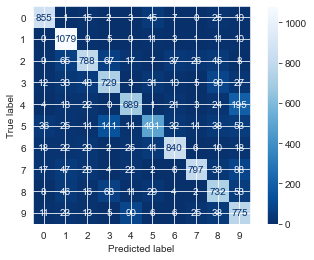

In [16]:
b_nb_model.test_eval.conf_mat()